Accuracy: 90.83%


D:\anaconda3\lib\site-packages\hypertools\plot\plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


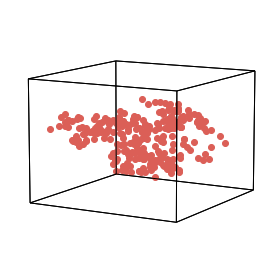

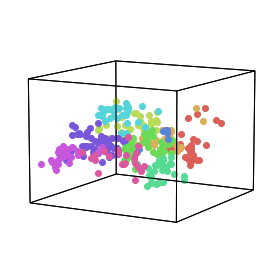

In [10]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
'''
@Project ：PCA
@File    ：main.py
@IDE     ：PyCharm
@Author  ：Johnson Yan
@Date    ：2022/12/11 18:20
'''
import random

import cv2
from glob import glob
import os
import hypertools as hyp

import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC


def orl_dataset(image_path='orl_faces/'):
    train_data = []
    test_data = []
    train_label = []
    test_label = []
    folder_num = len(os.listdir(image_path))
    for k in range(folder_num):
        folder = os.path.join(image_path, 's%d' % (k + 1))
        faces = len(os.listdir(folder))
        data = [cv2.imread(d, 0) for d in glob(os.path.join(folder, '*.pgm'))]

        # split train dataset and test dataset
        random_list = random.sample(range(0, 10), int(faces * 0.7))
        train_data.extend([data[i].ravel() for i in range(10) if i in random_list])
        test_data.extend([data[i].ravel() for i in range(10) if i not in random_list])
        train_label.extend([k for _ in range(int(faces * 0.7))])
        test_label.extend([k for _ in range(int(faces * 0.3))])

    return np.array(train_data), np.array(train_label), np.array(test_data), np.array(test_label)


def pca(data, k):
    data = np.float32(np.mat(data))
    rows, cols = data.shape
    data_mean = np.mean(data, 0)
    Z = data - np.tile(data_mean, (rows, 1))
    D, V = np.linalg.eig(Z * Z.T)
    V1 = V[:, :k]
    V1 = Z.T * V1
    for i in range(k):
        V1[:, i] /= np.linalg.norm(V1[:, i])
    return np.array(Z * V1), data_mean, V1


def main():
    train_data, train_labels, test_data, test_labels = orl_dataset()
    hyp.plot(train_data, 'o')
    pca1 = PCA(n_components=0.7)
    train_data_pca = pca1.fit_transform(train_data)  # 把原始训练集映射到主成分组成的子空间中
    test_data_pca = pca1.transform(test_data)  # 把原始测试集映射到主成分组成的子空间中
    hyp.plot(train_data_pca, 'o', n_clusters=10)
    clf = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
    # hyp.plot(train_data_pca, 'o')
    clf.fit(train_data_pca / 255, train_labels)
    predict = clf.predict(test_data_pca / 255)
    # hyp.plot(predict.reshape(200,1),'o', n_clusters=40)
    # hyp.plot(test_labels.reshape(200,1), 'o', n_clusters=40)
    print('Accuracy: %.2f%%' % ((predict == np.array(test_labels)).mean() * 100))


if __name__ == '__main__':
    main()